In [7]:
from config.config import CONFIGURATION_PATH
import utils.images_utils as hlpimage
from matplotlib import pyplot as plt
import utils.analysis_utils as hlpdf
from IPython.display import display
import utils.read_utils as hlpread
import seaborn as sns
import pandas as pd
import numpy as np
import sys 
import gc
import os

In [ ]:
current_dir = os.path.dirname(os.path.realpath('__file__'))
PROJECT_ROOT = os.path.abspath(os.path.join(current_dir, os.pardir))

## **Articles** ##

In [3]:
ARTICLES_MASTER_TABLE = os.path.join(PROJECT_ROOT, 
                                     hlpread.read_yaml_key(os.path.join(PROJECT_ROOT, CONFIGURATION_PATH),'data_source','data_folders'),
                                     hlpread.read_yaml_key(os.path.join(PROJECT_ROOT, CONFIGURATION_PATH),'data_source','raw_data'),
                                     hlpread.read_yaml_key(os.path.join(PROJECT_ROOT, CONFIGURATION_PATH),'data_source','article_data'),
                                    )

df_articles = pd.read_csv(ARTICLES_MASTER_TABLE)
df_articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [4]:
df_articles.shape

(105542, 25)

In [5]:
df_articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [6]:
df_articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [7]:
df_articles.iloc[5]

article_id                                                              110065011
product_code                                                               110065
prod_name                                                       OP T-shirt (Idro)
product_type_no                                                               306
product_type_name                                                             Bra
product_group_name                                                      Underwear
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                              12
colour_group_name                                                     Light Beige
perceived_colour_value_id                                                       1
perceived_colour_value_name                                           Dusty Light
perceived_colour

In [8]:
#Get Top 10 rows except 'detail_desc' column
df_articles.iloc[0:10,:-1]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"
6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
7,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
8,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
9,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights


**Observartion:**

* "desc_detail" brief information about the item. But there are 416 items where this detail is not provided. So we will not use this feature for item embedding. 

* "product_name" have char like "(1)" i.e special char with number. Also we can remove special char but there are name which has number e.g socks sold in set, in this case name has number of items in the set.  Will need to consider such case while processing "product_name" if we use this feature.


### Question: **Which set of features could be helpfull that can describe an item and will helpfull for Exploratory data analysis of transaction data?** ###

In [9]:
df_articles.product_type_name.unique()   

array(['Vest top', 'Bra', 'Underwear Tights', 'Socks', 'Leggings/Tights',
       'Sweater', 'Top', 'Trousers', 'Hair clip', 'Umbrella',
       'Pyjama jumpsuit/playsuit', 'Bodysuit', 'Hair string', 'Unknown',
       'Hoodie', 'Sleep Bag', 'Hair/alice band', 'Belt', 'Boots',
       'Bikini top', 'Swimwear bottom', 'Underwear bottom', 'Swimsuit',
       'Skirt', 'T-shirt', 'Dress', 'Hat/beanie', 'Kids Underwear top',
       'Shorts', 'Shirt', 'Cap/peaked', 'Pyjama set', 'Sneakers',
       'Sunglasses', 'Cardigan', 'Gloves', 'Earring', 'Bag', 'Blazer',
       'Other shoe', 'Jumpsuit/Playsuit', 'Sandals', 'Jacket', 'Costumes',
       'Robe', 'Scarf', 'Coat', 'Other accessories', 'Polo shirt',
       'Slippers', 'Night gown', 'Alice band', 'Straw hat', 'Hat/brim',
       'Tailored Waistcoat', 'Necklace', 'Ballerinas', 'Tie',
       'Pyjama bottom', 'Felt hat', 'Bracelet', 'Blouse',
       'Outdoor overall', 'Watch', 'Underwear body', 'Beanie', 'Giftbox',
       'Sleeping sack', 'Dungarees',

In [10]:
df_articles.product_group_name.unique()                    

array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

In [11]:
df_articles.index_name.unique()

array(['Ladieswear', 'Lingeries/Tights', 'Baby Sizes 50-98', 'Menswear',
       'Ladies Accessories', 'Sport', 'Children Sizes 92-140', 'Divided',
       'Children Sizes 134-170', 'Children Accessories, Swimwear'],
      dtype=object)

In [12]:
df_articles.index_group_name.unique()

array(['Ladieswear', 'Baby/Children', 'Menswear', 'Sport', 'Divided'],
      dtype=object)

In [13]:
df_articles.garment_group_name.unique()

array(['Jersey Basic', 'Under-, Nightwear', 'Socks and Tights',
       'Jersey Fancy', 'Accessories', 'Trousers Denim', 'Outdoor',
       'Shoes', 'Swimwear', 'Knitwear', 'Shirts', 'Trousers', 'Dressed',
       'Shorts', 'Dresses Ladies', 'Skirts', 'Special Offers', 'Blouses',
       'Unknown', 'Woven/Jersey/Knitted mix Baby', 'Dresses/Skirts girls'],
      dtype=object)

In [14]:
df_articles.graphical_appearance_name.unique()

array(['Solid', 'Stripe', 'All over pattern', 'Melange', 'Transparent',
       'Metallic', 'Application/3D', 'Denim', 'Colour blocking', 'Dot',
       'Other structure', 'Contrast', 'Treatment', 'Check', 'Chambray',
       'Front print', 'Glittering/Metallic', 'Mixed solid/pattern',
       'Placement print', 'Other pattern', 'Neps', 'Embroidery', 'Lace',
       'Jacquard', 'Unknown', 'Argyle', 'Slub', 'Mesh', 'Sequin',
       'Hologram'], dtype=object)

In [15]:
df_articles.colour_group_name.unique()

array(['Black', 'White', 'Off White', 'Light Beige', 'Beige', 'Grey',
       'Light Blue', 'Light Grey', 'Dark Blue', 'Dark Grey', 'Pink',
       'Dark Red', 'Greyish Beige', 'Light Orange', 'Silver', 'Gold',
       'Light Pink', 'Dark Pink', 'Yellowish Brown', 'Blue',
       'Light Turquoise', 'Yellow', 'Greenish Khaki', 'Dark Yellow',
       'Other Pink', 'Dark Purple', 'Red', 'Transparent', 'Dark Green',
       'Other Red', 'Turquoise', 'Dark Orange', 'Other', 'Orange',
       'Dark Beige', 'Other Yellow', 'Light Green', 'Other Orange',
       'Purple', 'Light Red', 'Light Yellow', 'Green', 'Light Purple',
       'Dark Turquoise', 'Other Purple', 'Bronze/Copper',
       'Other Turquoise', 'Other Green', 'Other Blue', 'Unknown'],
      dtype=object)

In [16]:
#Lets look at item image where color is "Unknown"
col_index = df_articles.columns.get_indexer(['article_id', 'product_code', 'prod_name','graphical_appearance_no', 'graphical_appearance_name', 
                                             'colour_group_code', 'colour_group_name', 
                                             'perceived_colour_value_id', 'perceived_colour_value_name', 
                                             'perceived_colour_master_id', 'perceived_colour_master_name'])
df_articles[df_articles.colour_group_name == "Unknown"].iloc[:,col_index]

#hlpimage.show_item_img_detail(df_articles[df_articles.colour_group_name == "Unknown"].iloc[:6], False)

,article_id,product_code,prod_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name
21238,592986010,592986,Cool tiebelt dressed,-1,Unknown,-1,Unknown,-1,Unknown,-1,Unknown
39690,662344003,662344,Lily blouse,-1,Unknown,-1,Unknown,-1,Unknown,-1,Unknown
40806,665665001,665665,J LORENZO TRS EQ,-1,Unknown,-1,Unknown,-1,Unknown,-1,Unknown
49595,694968001,694968,Sagus Jogger,-1,Unknown,-1,Unknown,-1,Unknown,-1,Unknown
49597,694968004,694968,Sagus Jogger,-1,Unknown,-1,Unknown,-1,Unknown,-1,Unknown
50122,696114001,696114,W MARS TRS CNY,-1,Unknown,-1,Unknown,-1,Unknown,-1,Unknown
50123,696114002,696114,W MARS TRS CNY,-1,Unknown,-1,Unknown,-1,Unknown,-1,Unknown
50129,696124001,696124,W PASTILLE DRESS CNY,-1,Unknown,-1,Unknown,-1,Unknown,-1,Unknown
50130,696124002,696124,W PASTILLE DRESS CNY,-1,Unknown,-1,Unknown,-1,Unknown,-1,Unknown
50289,696500001,696500,J MADRID CNY,-1,Unknown,-1,Unknown,-1,Unknown,-1,Unknown


**Observations**

-> We have "Unknown" label type for feature "colour_group_name", "graphical_appearance_name", "garment_group_name", "product_type_name" which need to be consider if transactions of any item are done. We might need to take care of any of such record when merge with transaction table.

**Note**: To check the actual item vist H&M website product page and enter the article id in the URL it will display the item.
**E.g**

* https://www2.hm.com/en_us/productpage.0743722002.html - US Site 
* https://www2.hm.com/en_in/productpage.0811198001.html - INDIA Site

Each article_id should be of len 10. So pad 0 at the front to get the product detail page.


In [ ]:
#Randomly sample 15 item and show the item image 
#hlpimage.show_item_img_detail(items = df_articles.sample(n = 15), show_item_detail = False)

# Randomly sample item and show item image with there details
# hlpimage.show_item_img_detail(items = df_articles.sample(n = 2), show_item_detail = True)
# hlpimage.show_item_img_detail(items = df_articles[df_articles.article_id == 743722002], show_item_detail = False)

In [21]:
# Some cleaning is requred in prod_name as same product code has different prod_name e.g 783707. 
# We can groupby 'product_code' and then take top 1 row as product_name for all 

data = (df_articles['product_code'].value_counts()
                    .reset_index(name = 'no_count')
                    .rename(columns = {'index':'product_code'})
                    .merge(df_articles[['product_code','prod_name']]
                            .groupby('product_code')
                            .nth(0)
                            .reset_index(), 
                        on = 'product_code', 
                        how = 'inner'
                        )
                )

#Top 20 product code
data[:10]

,product_code,no_count,prod_name
0,783707,75,1pk Fun
1,684021,70,Wow printed tee 6.99
2,699923,52,Mike tee
3,699755,49,Yate
4,685604,46,TOM FANCY
5,739659,44,Dragonfly dress
6,664074,41,Charlie Top
7,570002,41,ROY SLIM RN T-SHIRT
8,562245,41,Luna skinny RW
9,685816,41,RONNY REG RN T-SHIRT


In [22]:
per = (data[data.no_count > 1].shape[0] / data.shape[0])*100
print(f'Percetange of items have similar product: {per}')

Percetange of items have similar product: 49.03862442825682


**Observartion**
* There are approx 47K unique product code for 105K items. That means we have 49% of items that are similary i.e same product code with difference in color etc. This will helpfull when generating embededing for items from there images.
Lets randomly sample product code to compare the items to see how these item differ.

In [ ]:
#Lets randomly select 
groupby = "product_code"
hlpimage.show_item_img_detail(items = hlpdf.random_sample_by_catagory(df = df_articles, filter = '', group_by = groupby,  no_sample = 15),
                         show_item_detail = False )

In [ ]:
#Randomly selected item that has almost 75 unique items
hlpimage.show_item_img_detail(df_articles[df_articles.product_code == 783707])

In [ ]:
filter = { 'index_group_name': 'Baby/Children'}
groupby = "product_group_name"

hlpimage.show_item_img_detail(items = hlpdf.random_sample_by_catagory(df_articles, filter, groupby, no_sample = 4), 
                         show_item_detail = True ) 

In [ ]:
df_articles[(df_articles.index_group_name  == "Baby/Children")]['product_group_name'].unique()

In [ ]:
filter = { 'index_group_name': 'Ladieswear'}
groupby = "product_group_name"

hlpimage.show_item_img_detail(items = hlpdf.random_sample_by_catagory(df_articles, filter, groupby, no_sample = 4), 
                         show_item_detail = True )

In [ ]:
filter = (df_articles.index_group_name  == "Baby/Children") & (df_articles.product_type_name  == "Fine cosmetics")
df_articles[filter].iloc[:5,:-1]

In [ ]:
#Set to show max number of rows. None: No restriction 
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_rows', 50) #This setting never works

col_index = df_articles.columns.get_indexer(['article_id', 'product_code', 
                                             'prod_name','product_type_name', 'product_group_name', 
                                             'index_name', 'index_group_name', 
                                             'garment_group_name'])

#Random select 50 items for analysis
#replace = True means  meaning that a value of a can be selected multiple times.
chosen_idx = np.random.choice(df_articles.shape[0], replace = False, size = 50)

df_articles.iloc[chosen_idx, col_index]

#pd.reset_option('display.max_rows') #To reset the maxrow setting that is set in first line

In [ ]:
#Can we assume that article_id in increment number i.e where new item is added to catalog number is incremental. 
sorted(df_articles.article_id.unique())[:15]#, kind='heapsort'

#Items are not in increment order

**Observartion**

1. Some case either "prod_name" or "product_type_name" include the brand the item belong to. 
    **e.g**  prod_name = "ARTICHOKE SLIM FIT POLO" or product_type_name = "Polo shirt". 
    Its not usefull since not all items has brand name in them and also since for a given text we don't know which is a name of brand or the product_name.

2. We have 418 data points that has blank "detail_desc" feature. So this feature cannot be helpfull

3. Color is an usefull feature for recommendation as some people tends to have preference over specific color. 
    * From given features that represent color of the item we will consider "colour_group_name" feature. This feature specify the actual color represenation of the item. There as other color related feature provide addtional info about there color group. 
    **e.g** 
            colour_group_name               : Light Beige
            perceived_colour_value_name     : Dusty Light
            perceived_colour_master_name    : Beige

    * "colour_group_name" will be used instead of "colour_group_code". We could convert colour to RGB as any new color can be represented using combination of these three color. We could use "colour_group_code" but for any new colour add a new number is added and for ML each numberic number is difference. In case for color even a small change in the percentage of the color will be represent a different color that could help to find item with similar color shade. **e.g** "Pink" with color as 18. New color with some other shade of pink **e.g** "Baby pink" with code as 22. So when algo when compare 18 and 22 it may find it different where as actually there are closer to each other in color shade.

4. "Unknown" label type for features "colour_group_name", "graphical_appearance_name", "garment_group_name", "product_type_name" which need to be consider if transactions of any item are done for those items. We need to take care of any of such record when merge with transaction table. "graphical_appearance_no" we can use that help to describe the item which is the numerical represenation of "graphical_appearance_name". Some of the product has value "Unknown" for "graphical_appearance_name" which is map to -1 in graphical_appearance_no

5. Approx 47K unique product code for 105K items.

6. Found article where image was crop like article 617835001 for Sweater.

7. Similary product have similar "prod_name". So instead of "product_code" we should use "prod_name" so that similar type of item-item can be closer in the feature space. Why don't we user product_type_no? Because different "prod_name" belonge to same "product_type_no". **e.g** in Baby catagory Lip balm and Nail Polish both belong to same product type no i.e 98 (Fine Cosmetics). But both are different products. We can use product_group_name that unique catagory the product overall group/catagory. 

8. For most items "product_type_name" is the part of "prod_name" E.g 956217002, 952938001. But there where items e.g 637561002, 110065001 where this was not the case. So we can merge the "product_type_name" and "prod_name" feature such that if the "product_type_name" is not a part of "product_name" include that word. So now "prod_name" feature will also include its type.

9. There are some case when the "product_group_name" is part of "product_type_name" 
 e.g Where "product_type_name" =  "Fine cosmetics" and "product_group_name" = "Cosmetic" But not in the "prod_name" = "Lip balm unicorn"	

	So we can merge 

                            prod_name + product_type_name 
	
    		                        OR	
    
    			prod_name + product_type_name + product_group_name 

10. We can also try, instead of merging "product_group_name" with "product_type_name", we could user "garment_group_name" as this give overall idea which catagory them item belong to and use "product_group_name" as seperate feature column by converting its catagory(19 unique catagory) to int. i.e


**New feature engineered could be  

                            ----------------------------------------------------------------------------------

                            |            Feature 1                                      |   Feature 2        |
                            
                            ------------------------------------------------------------|---------------------
                            
                            |   (prod_name + product_type_name + garment_group_name)    | product_group_name |
                            
                            ----------------------------------------------------------------------------------

**Points to conside while cleaning data:**

* Need to do cleaning in the prod_name, product_type_name, garment_group_name  that has (,),/,-,',',+ and number 

* Some generalize is require for product_type_name

* Remove the word 'Under-,' from the garment_group_name that is used for "NightWear".

* Handel "Unknown" labels for any feature columns. "product_type_name"  has value of "Unknown".

* Since the features does not include when the item was release need to find a way to see get that latest item. Since fashion industry user should be show latest items for recommendation. When sorted "article_id" field it want not in incremental order by +1 

In [ ]:
del df_articles
gc.collect()

## **Customer** ##

In [6]:
CUSTOMER_MASTER_TABLE = os.path.join(PROJECT_ROOT, 
                                     hlpread.read_yaml_key(os.path.join(PROJECT_ROOT, CONFIGURATION_PATH),'data_source','data_folders'),
                                     hlpread.read_yaml_key(os.path.join(PROJECT_ROOT, CONFIGURATION_PATH),'data_source','raw_data'),
                                     hlpread.read_yaml_key(os.path.join(PROJECT_ROOT, CONFIGURATION_PATH),'data_source','customer_data'),
                                    )

df_customer = hlpread.read_csv(CUSTOMER_MASTER_TABLE)
df_customer.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [12]:
print('Shape: {0}'.format(df_customer.shape))

Shape: (1371980, 7)


In [13]:
df_customer.info(memory_usage ="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 512.3 MB


**Feature description**:

* customer_id: Unique customer id
* FN: if a customer get Fashion Newsletter
* Active: if the customer is active for communication
* club_member_status: customer member ship status. 
* Fashion_news_frequency: Frequency to send the newsletter
* age: Customer age. 
* postal_code: customer area address. It is hashed

In [14]:
df_customer.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [15]:
df_customer[df_customer.duplicated()].count()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
dtype: int64

In [16]:
df_customer.club_member_status.value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [17]:
df_customer.fashion_news_frequency.unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [19]:
#List of Customer that has subscribe for fashion newletter but fashion news frequency is NONE
df_customer.loc[(df_customer.FN == True) & (df_customer.fashion_news_frequency == 'NONE')].head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
335,00100a3fbf886724f574b726bdb47cf5b4fba1acbd2cc4...,1.0,NaN,ACTIVE,NONE,22.0,f187902768ee417d3a60f1bbf75ce8f1e7c3fee0faf76b...
4625,00de2fe7582d25a39ec1048c2e2bc7e7886e27584117a4...,1.0,NaN,ACTIVE,NONE,48.0,ba68f926e274d43f09ca7bea64e37dea6e9257c6cfc365...
4744,00e5472c3c40e199418cbadba94c382498635b64c1f97f...,1.0,1.0,ACTIVE,NONE,35.0,2797bdbad712b10673728ce4caa2383604984857038fdc...
6818,014729b8db910433a7188805ef2d0a1c9920f2d0c59a67...,1.0,1.0,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
11518,02245dbf97e78482e7b6f23ab4fbc7d445ec57ddb9930d...,1.0,1.0,ACTIVE,NONE,22.0,3c673ca2c53346227296ea0f10a45254931d5305841287...


In [8]:
df_customer.age.describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

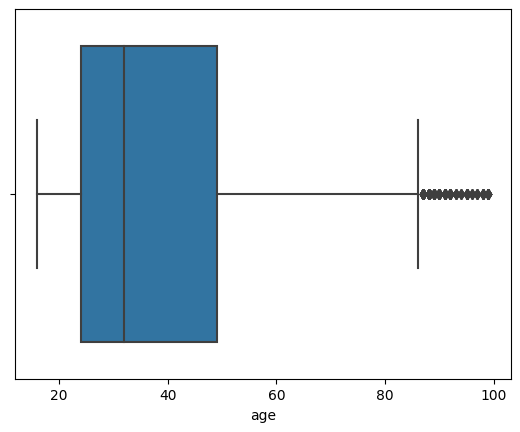

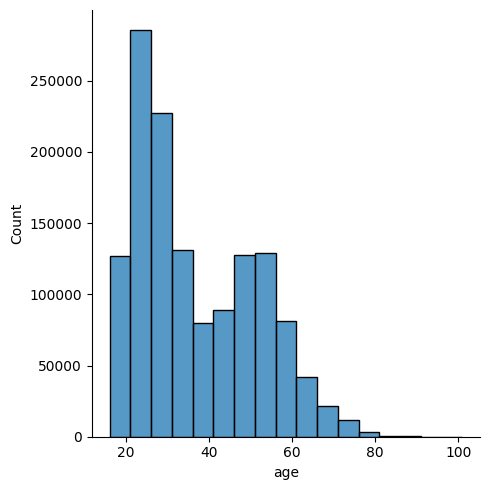

In [9]:
#fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (10, 6))
#fig.suptitle('Distrubution of ''Age''')
#ax1 = plt.boxplot(x = df_customer.age ) #sns.boxplot()
#ax2 = plt.hist(x = df_customer.age, bins = 5)#sns.displot(df_customer, x = "age",  binwidth = 5)
sns.boxplot(x = df_customer.age)
sns.displot(df_customer, x = "age",  binwidth = 5)
plt.show()

**Observations**

1. We have null values in almost all the column.
2. No duplicate records.
3. Will need to check if there is any relationship between fashion new letter and customer purchase.
4. Age feature could be usefull. But we are not sure if that is the customer current age or age at time of registration when they made first purchase. We assume that the age provided is the current age of the customer.
5. postal_code feature could have benn helpfull if that was not hashed. Since this will provide us the geographical detail of the customer that will help to recommended certain type of cloths and fabric.
6. "Subscribe Fashion newsletter" and "Fashion news frequency" feature are not related for recommendation. As we do not know if the customer purchase behaviour based on newsletter. i.e if customer receive newsletter they are likely to make a purchase or not. Also the transaction records does not have any information of the customer made the pruchase based on newsletter that company sents out. 
7. Outlier in age feature.
    * 50% percentile of user are in age range of 20-35
    * There is a customer with age of 99 which we can be treated as outlier. So we need to drop user with age of 99. i.e any user with age more then Q3 will be consider as outlier.
    * Customer with missing age have made traansion in last 3 month transaction data. Based on blox plot it is right skewed so replacing missinge age with mean will not give good idea. So we shall replace missing values with median.

In [20]:
del df_customer
gc.collect()

83

## **Transaction Data** ##

In [3]:
TRANSACTION_DATA_TABLE = os.path.join(PROJECT_ROOT, 
                                     hlpread.read_yaml_key(os.path.join(PROJECT_ROOT, CONFIGURATION_PATH),'data_source','data_folders'),
                                     hlpread.read_yaml_key(os.path.join(PROJECT_ROOT, CONFIGURATION_PATH),'data_source','raw_data'),
                                     hlpread.read_yaml_key(os.path.join(PROJECT_ROOT, CONFIGURATION_PATH),'data_source','transaction_data'),
                                    )

df_transaction = pd.read_csv(TRANSACTION_DATA_TABLE,                             
                             parse_dates = ['t_dat'],                                                                     
                            )

df_transaction.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [4]:
df_transaction.shape

(31788324, 5)

In [5]:
max_t_date = df_transaction.t_dat.max()
min_t_date = df_transaction.t_dat.min()

print(f'Transaction records from: {min_t_date} to {max_t_date}')

Transaction records from: 2018-09-20 00:00:00 to 2020-09-22 00:00:00


In [6]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


In [7]:
df_transaction.info(memory_usage ="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.5 GB


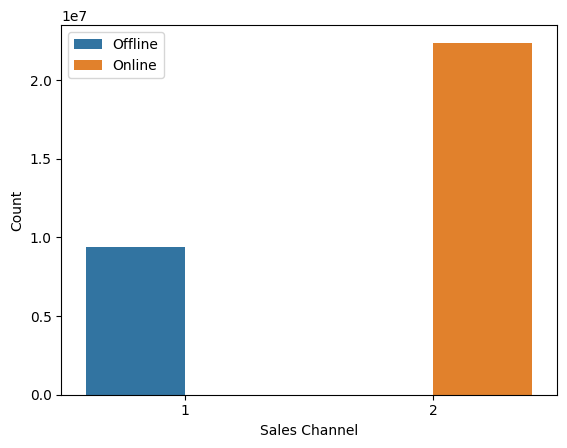

In [8]:
ax = sns.countplot( 
                    data = df_transaction,
                    x = 'sales_channel_id',
                    hue ='sales_channel_id',
                  )
                  
ax.set_xlabel("Sales Channel")
ax.set_ylabel("Count")
ax.legend(labels = ['Offline', 'Online'])

**Transactions data description:**
<ul> 
<li> t_dat <span style="color:#023e8a;">: Date of the transaction i.e customer purchase date. DataType: datetime </span> </li> 

<li> article_id <span style="color:#023e8a;"> A unique identifier of every article (in articles table). DataType: int64 </span> </li>

<li> price <span style="color:#023e8a;">: Price of purchase. DataType: float64 </span> </li> 

<li> sales_channel_id <span style="color:#023e8a;">: Channel throught which purchase was made. DataType: object </span> </li>
        <span style="color:#023e8a;"> <ul>  <li>Store: 1 </li>  <li>Online: 2</li> </ul>  </span>

<li> customer_id <span style="color:#023e8a;">:  A unique identifier of every customer (in customers table). DataType: object </span> </li>
</ul>

**Observations**

1. We have 31 million transaction data points for 3 years, starting from September 2018. 
2. Sales happening over offline channel is less compare to online. 
3. Size of the data is 4.5 GB.
4. We can reduce the data by only considering last 1 year worth of data. Since fashion trend changes fast so does the user preference.
5. We can also reduce the size by changing the data type of the fields and keep only relevent column. 
                 
        1. Convert 'customer_id' feature is a length 64 string which uses 64 bytes. We shall convert it to int64 which only takes 8 bytes
        2. Change datatype of 'article_id' feature from int64 -> unsigned int16
        3. Change datatype of 'price' feature from float64->float16.
        4. Convert 'sales_channel_id' feature to bool datatype that will store True/False if the sale come from online. We can rename 'sales_channel_id' to 'online_sale'

6. We could can drop 'sales_channel_id' feature, irrespective if the customer made purchase online or ofline the user preference should be noted so that if any item that user purchase from offline will also help us to recommend the item when shopping online. Lets analytics more to check this feature importance

        
        

In [10]:
del df_transaction
gc.collect()

42